### Load data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import exploration.commons as pltutil
from exploration.comments_exploration import cloud


utterances_df = pd.read_csv('./temp_data/pp_utterances.csv')
len(utterances_df)


262656

In [2]:
df_grp = utterances_df[['id','author_role']].groupby('author_role').count().reset_index().rename(columns={'author_role':'Author Role','id':'Count'})
df_grp = df_grp.set_index('Author Role')
df_grp.transpose()

Author Role,assignee,others,reporter
Count,102130,110828,49698


In [3]:
# utterances_df = utterances_df[utterances_df['author_role'] == 'assignee']

### Words exploration

#### Words cloud

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


(65125, 259317)

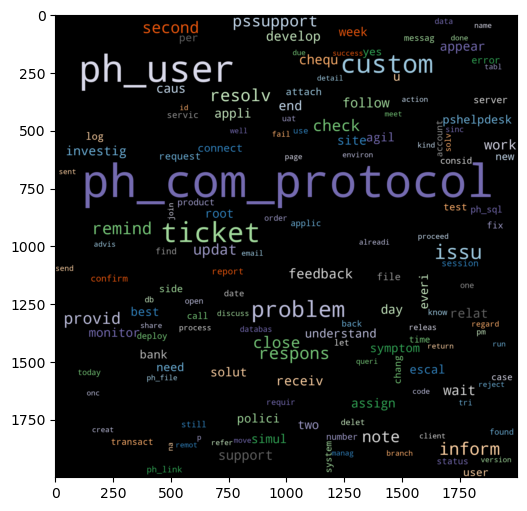

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cloud_df = utterances_df[['pp_actionbody','author','author_role']].reset_index()
cloud_df = cloud_df[~pd.isna(cloud_df['pp_actionbody'])]
cloud_df.drop_duplicates()
cloud(cloud_df,ax,max_words=150)

In [5]:
utterances_df[['words_count','pp_words_count']].describe().rename(columns={'words_count':'Words Count','pp_words_count':'Words Count (Preprocessed)'}).transpose()

,count,mean,std,min,25%,50%,75%,max
Words Count,262656.0,7.528006,12.027254,1.0,1.0,2.0,10.0,495.0
Words Count (Preprocessed),262656.0,4.574481,7.285184,0.0,1.0,2.0,6.0,358.0


#### Words count per issue

In [6]:
words_per_issue_df = utterances_df[['issueid','words_count','pp_words_count']].groupby("issueid").sum()

In [7]:
words_per_issue_df.describe().rename(columns={'words_count':'Words Count','pp_words_count':'Words Count (Preprocessed)'}).transpose()

,count,mean,std,min,25%,50%,75%,max
Words Count,5451.0,362.736379,342.652860,20.0,214.0,280.0,397.0,11101.0
Words Count (Preprocessed),5451.0,220.421024,219.477344,13.0,130.0,167.0,239.0,7374.0


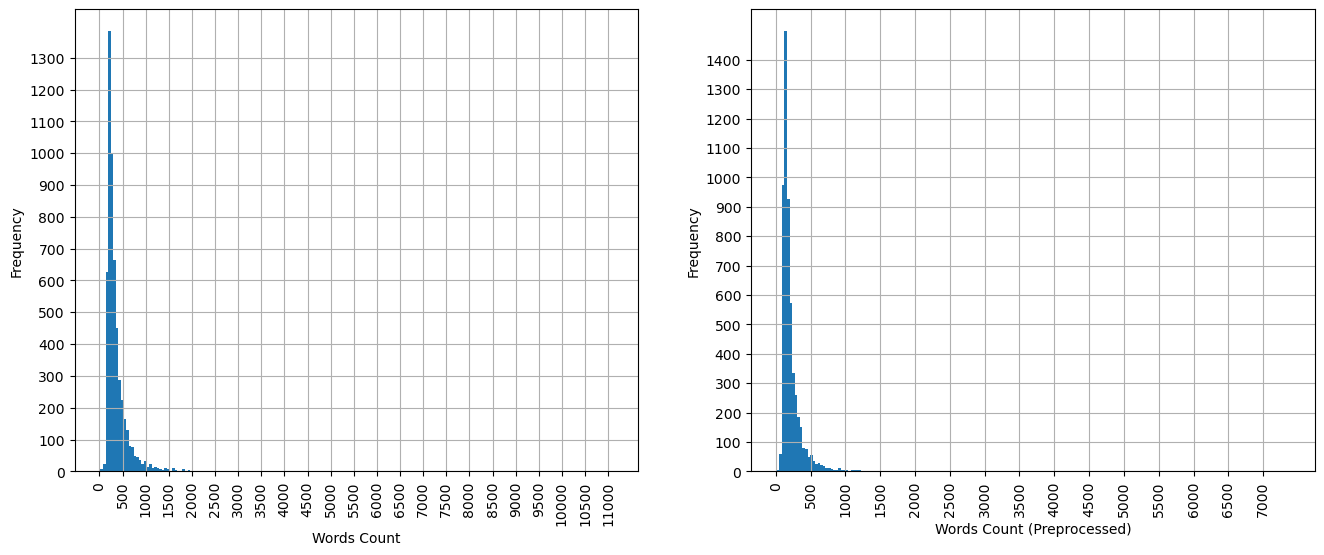

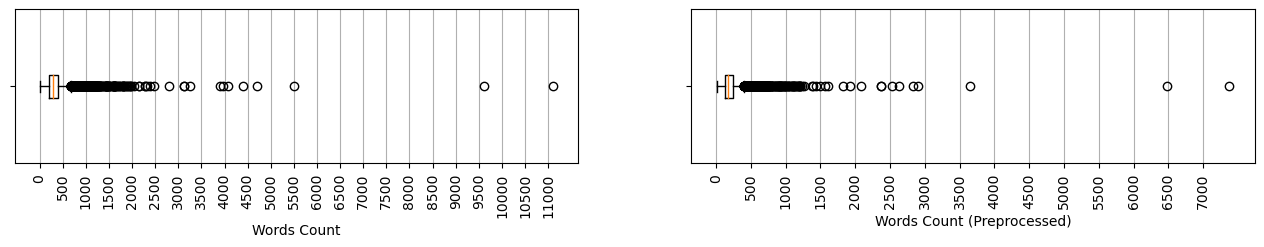

In [8]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)

pltutil.plot_hist(ax, 
        words_per_issue_df['words_count'], 
        bins=200,
        xlabel='Words Count',
        ylabel='Frequency',
        grid='both', 
        max_y=1400,
        xsteps=500,
        ysteps=100,
        xrotation=90)

ax = fig.add_subplot(122)

pltutil.plot_hist(ax, 
        words_per_issue_df['pp_words_count'], 
        bins=200,
        xlabel='Words Count (Preprocessed)',
        ylabel='Frequency',
        grid='both', 
        max_y=1500,
        xsteps=500,
        ysteps=100,
        xrotation=90)

fig = plt.figure(figsize=(16,2))
ax = fig.add_subplot(121)
pltutil.plot_box(ax,
                  words_per_issue_df['words_count'], 
                  label='Words Count',
                  vertical=False,
                  steps=500,
                  grid='x',
                  rotation=90)

ax = fig.add_subplot(122)
pltutil.plot_box(ax,
                  words_per_issue_df['pp_words_count'], 
                  label='Words Count (Preprocessed)',
                  vertical=False,
                  steps=500,
                  grid='x',
                  rotation=90)

#### Words per comment

In [9]:
words_per_comment_df = utterances_df[['id','issueid','words_count','pp_words_count']].groupby(['id','issueid']).sum()
words_per_comment_df.head(3)

,,words_count,pp_words_count
id,issueid,,
1045247.0,1004285.0,56,38
1045248.0,1004285.0,64,38
1045249.0,1004285.0,13,8


In [10]:
words_per_comment_df[['words_count','pp_words_count']].describe().rename(columns={'words_count':'Words Count','pp_words_count':'Words Count (Preprocessed)'}).transpose()

,count,mean,std,min,25%,50%,75%,max
Words Count,60148.0,32.873512,44.411020,1.0,13.0,22.0,47.0,4036.0
Words Count (Preprocessed),60148.0,19.975976,29.557761,0.0,8.0,13.0,27.0,2769.0


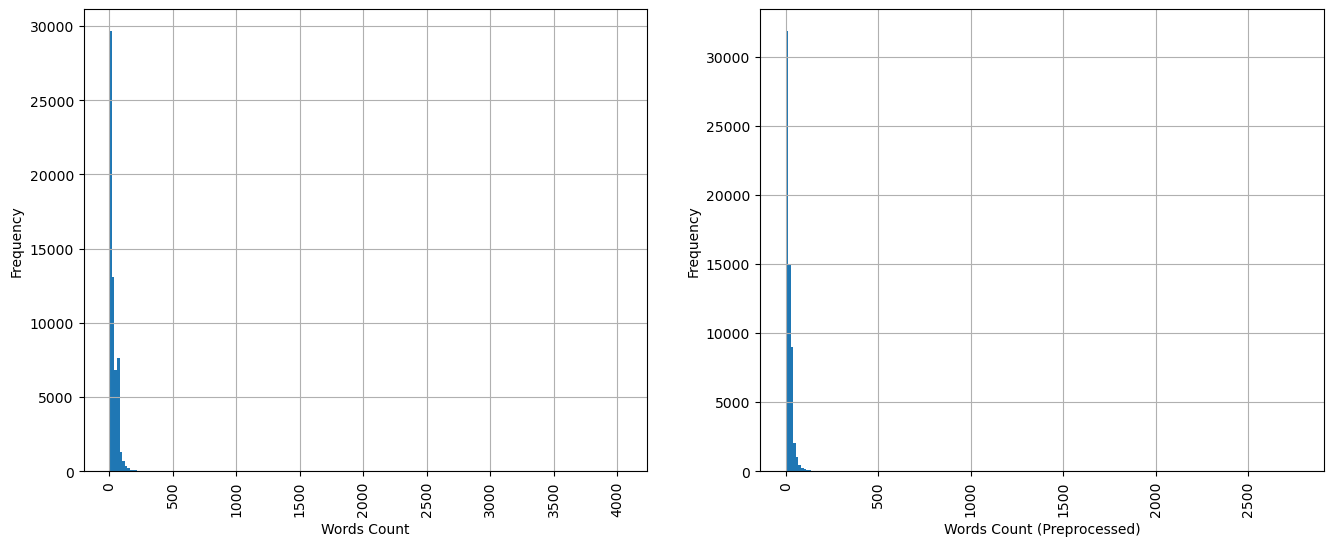

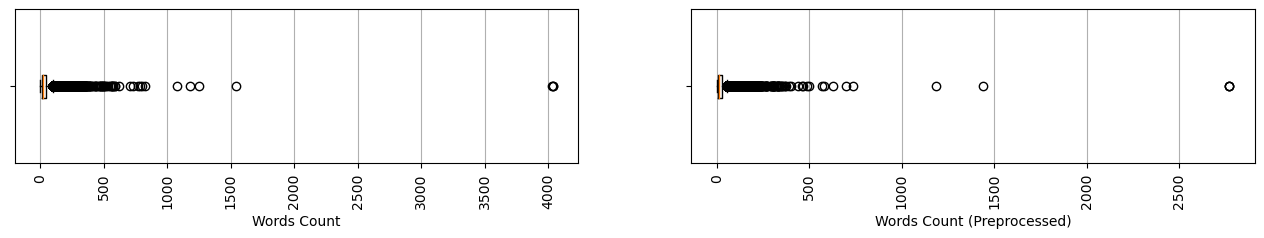

In [11]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)

pltutil.plot_hist(ax, 
        words_per_comment_df['words_count'], 
        bins=200,
        xlabel='Words Count',
        ylabel='Frequency',
        grid='both', 
        max_y=35000,
        xsteps=500,
        ysteps=5000,
        xrotation=90)

ax = fig.add_subplot(122)

pltutil.plot_hist(ax, 
        words_per_comment_df['pp_words_count'], 
        bins=200,
        xlabel='Words Count (Preprocessed)',
        ylabel='Frequency',
        grid='both', 
        max_y=35000,
        xsteps=500,
        ysteps=5000,
        xrotation=90)

fig = plt.figure(figsize=(16,2))
ax = fig.add_subplot(121)
pltutil.plot_box(ax,
                  words_per_comment_df['words_count'], 
                  label='Words Count',
                  vertical=False,
                  steps=500,
                  grid='x',
                  rotation=90)

ax = fig.add_subplot(122)
pltutil.plot_box(ax,
                  words_per_comment_df['pp_words_count'], 
                  label='Words Count (Preprocessed)',
                  vertical=False,
                  steps=500,
                  grid='x',
                  rotation=90)

### Utterances exploration

In [12]:
comments_per_issue_df = utterances_df[['issueid', 'id', 'utr_seq']].groupby(['issueid', 'id']).count()
comments_per_issue_df = comments_per_issue_df.rename(columns={'utr_seq': 'utterances_count'})
comments_per_issue_df.head(10)

utterances_count
issueid   id                           
1004285.0 1045247.0                   9
          1045248.0                   1
          1045249.0                   4
          1045250.0                   3
          1045251.0                   4
          1045252.0                   2
          1046056.0                   3
          1046059.0                   3
          211718001.0                10
1004286.0 1045265.0                  14

In [13]:
comments_per_issue_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
utterances_count,60148.0,4.366828,4.320464,1.0,2.0,4.0,5.0,340.0


In [14]:
utter_per_issue_df = comments_per_issue_df.groupby('issueid').sum('utterances_count')
utter_per_issue_df.head(5)

,utterances_count
issueid,
1004285.0,39
1004286.0,26
1004287.0,49
1004288.0,31
1004289.0,45


In [15]:
utter_per_issue_df.describe().rename(columns={'utterances_count':'Utterances Count'}).transpose()

,count,mean,std,min,25%,50%,75%,max
Utterances Count,5451.0,48.18492,45.0064,2.0,29.0,37.0,52.0,1126.0


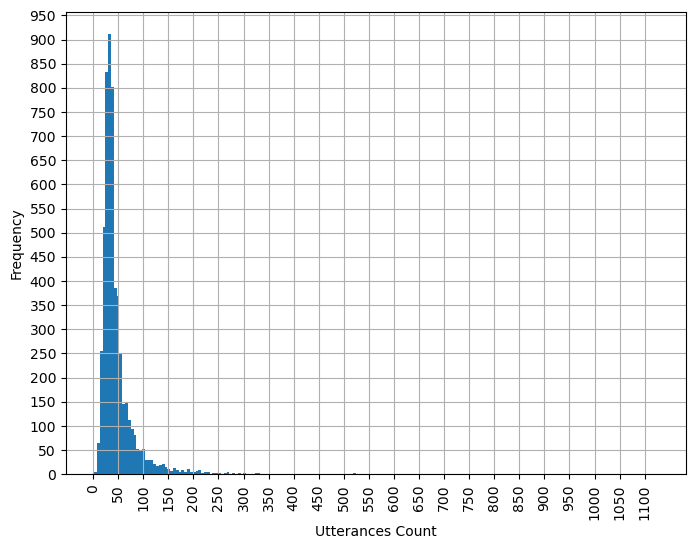

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

pltutil.plot_hist(ax, 
        utter_per_issue_df['utterances_count'], 
        bins=200,
        xlabel='Utterances Count',
        ylabel='Frequency',
        grid='both', 
        max_y=1000,
        xsteps=50,
        ysteps=50,
        xrotation=90)

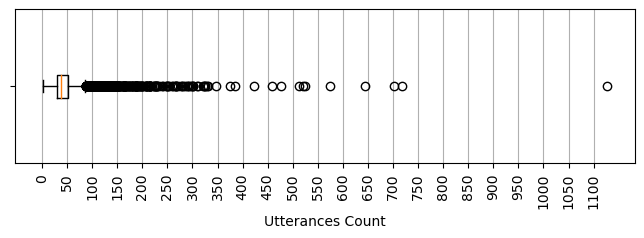

In [17]:
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
pltutil.plot_box(ax,
                  utter_per_issue_df['utterances_count'], 
                  label='Utterances Count',
                  vertical=False,
                  steps=50,
                  grid='x',
                  rotation=90)
